<a href="https://colab.research.google.com/github/belleorlandi/pds_ufabc2019/blob/master/pds_exC1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


# Processamento Digital de Sinais 
## *Exercício Computacional 1*


---




**Nome:** Isabelle Orlandi

**RA:** 11056613




---


## Objetivos

Este Exercício Computacional tem como objetivo introduzir o uso da ferramenta Jupyter Notebook para elaboração de códigos e relatórios relacionados ao processamento digital de sinais. Tem ainda como objetivo específico, fixar e consolidar conhecimentos sobre sinais digitais e funções de convolução no domínio discreto obtidos na disciplina de Procesamento Digital de Sinais.        





---


## Exercícios

### Exercício 1 

Implemente um algoritmo comentado que seja capaz de calcular a convolução discreta de dois sinais quaisquer $x(n)$ e $h(n)$, de duração finita, utilizando uma das três diferentes formas de se calcular a convolução, descritas nos itens abaixo. Considere o sinal $x(n)$ como sendo um vetor contendo $N_x$ linhas e uma coluna, o sinal $h(n)$ como sendo um vetor contendo $N_h$ linhas e uma coluna e o sinal $y(n)$, contendo o resultado da convoluçao, como sendo um vetor de $N_y = N_x +N_h -1$ linhas e uma coluna. 


**(a)** Um dos métodos consiste em calcular a convolução através da expressão $y(n) = \sum_{k=-\infty}^{\infty} x(k)h(n-k)$, onde cada amostra dos sinal $y(n)$ é calculada individualmente.




**(b)** O outro método consiste em calcular o vetor $y(n)$ como uma combinação linear de $N_x$ vetores $h(n-k)$ contendo o sinal $h(n)$ atrasado de $k$ amostras, ponderados por $x(k)$. Observe que o vetor $h(n-k)$, para todos os valores de $k$, é um vetor com $N_y = N_x +N_h -1$ linhas e uma coluna. 


**(c)** O último método é baseado na multiplicação do vetor $x(n)$ pela matriz de convolução $H$, de dimensão $N_y = N_x +N_h -1$ linhas e $N_x$ colunas. Cada coluna da matriz $H$ é dado pelo vetor $h(n-k)$ contendo o sinal $h(n)$ atrasado de $k$ amostras. 








> Para a resolução do exercício 1, onde é proposta a implementação de uma função que realize a convolução discreta de dois sinais, optou-se pelo método descrito no item (a), onde o sinal resultado da convolução é calculado individualmente para cada fator $n$ a partir da expressão $y(n) = \sum_{k=-\infty}^{\infty} x(k)h(n-k)$. A escolha deste método ocorreu apenas pela sua simplicidade de implementação e código sucinto. 
> As proxímas seções apresentam a implementação da função $conv()$ e o código está comentado para melhor entendimento da metodologia utilizada. 





In [0]:
# Importação das bibliotecas necessárias

import numpy as np                         #Biblioteca para operações matemáticas
import matplotlib.pyplot as plt            #Biblioteca para plotar gráficos

In [0]:
h = np.array([1,2])
h = h.reshape(len(h),1)

In [0]:
# Definicação da função convolução discreta

def conv(a,b):
    
    a = h.reshape(1,len(a))
    B = h.reshape(1,len(b))

    
    lengthA = np.size(A)
    lengthB = np.size(B)
    
    C = np.zeros(lengthA + lengthB - 1)
    
    for m in np.arange(lengthA):
        for n in np.arange(lengthB):
            C[m+n] = C[m+n] + A[m]*B[n]
           
    return C

In [0]:
Cv = convolution(x,h)

<StemContainer object of 3 artists>

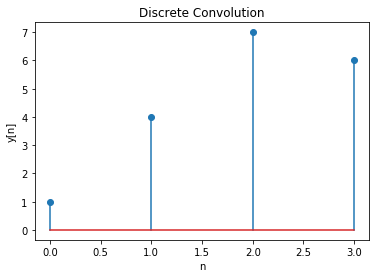

In [12]:
plt.xlabel('n')
plt.ylabel('y[n]')
plt.title('Discrete Convolution')
plt.stem(Cv)


### Exercício 2



---


## Resultados

E foram felizes para sempre.